In [48]:
import pandas as pd
import plotly.express as px

In [49]:
anb = pd.read_csv('AB_NYC_2019.csv')
anb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [50]:
missing_values = anb.isnull().sum()
missing_values

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [51]:
anb_cleaned = anb.dropna(subset=['name','host_name','last_review','reviews_per_month'])
anb_cleaned.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   
5        Chris           Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   
5  Entire home/apt    200               3                 74  2019-06-22   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
3               4.64                               1               194  
4               0.10                               1                 0  
5               0.59                               1               129

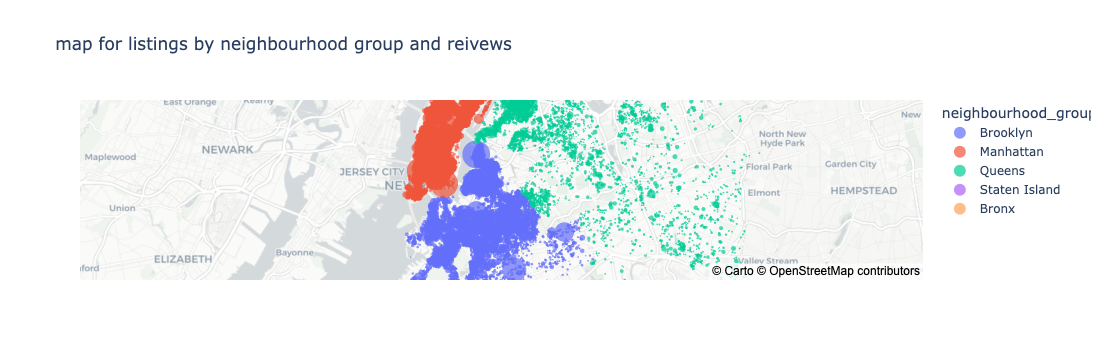

In [52]:
fig = px.scatter_mapbox(anb_cleaned, lat = 'latitude', lon = 'longitude', color = 'neighbourhood_group', 
                       size = 'price', title = 'map for listings by neighbourhood group and reivews',
                        mapbox_style = 'carto-positron',
                       center = {'lat':40.7128,'lon':-74.0060},
                       zoom = 10
                       )
fig.show()

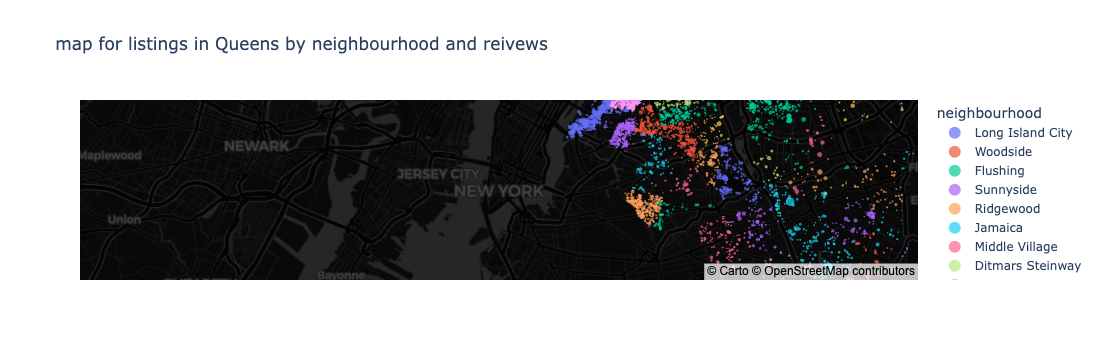

In [53]:
anb_queens = anb_cleaned[anb_cleaned['neighbourhood_group'] == 'Queens']

fig2 = px.scatter_mapbox(anb_queens, lat = 'latitude', lon = 'longitude', color = 'neighbourhood', 
                       size = 'price', title = 'map for listings in Queens by neighbourhood and reivews',
                        mapbox_style = 'carto-darkmatter',
                       center = {'lat':40.7128,'lon':-74.0060},
                       zoom = 10
                       )
fig2.show()

In [ ]:
import json
fig2.to_json()

In [57]:
fig2_json = json.loads(fig2.to_json())
fig2_json.keys()

dict_keys(['data', 'layout'])

In [58]:
fig2_json['data'][0]['marker']['color']

'#636efa'

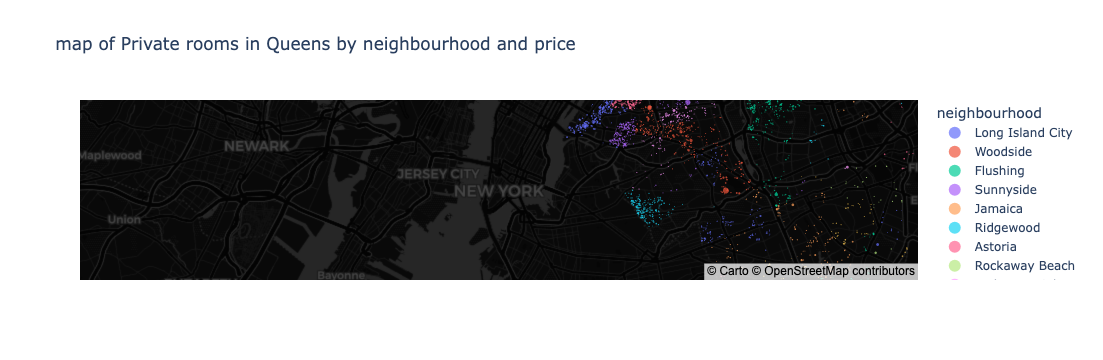

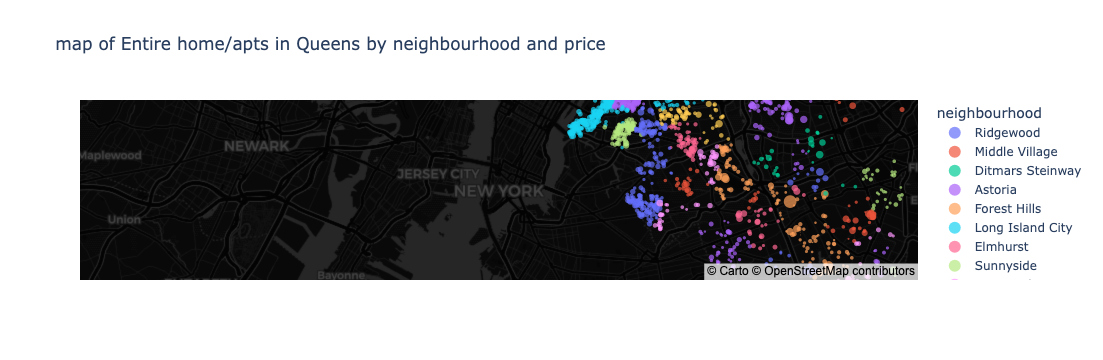

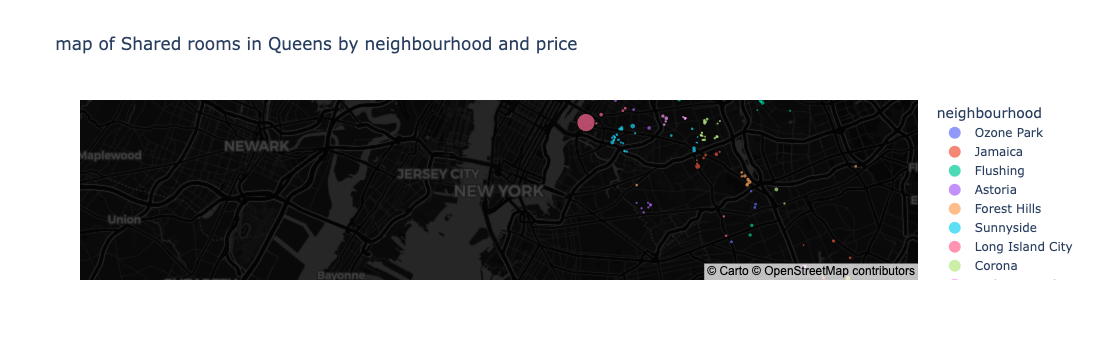

In [54]:
def create_map_for_room_type(room_type):
    df_room_type = anb_queens[anb_queens['room_type']== room_type]

    fig = px.scatter_mapbox(
        df_room_type,
        lat = 'latitude',
        lon = 'longitude',
        color= 'neighbourhood',
        size = 'price',
        hover_name = 'name',
        hover_data = {
            'price': True,
            'room_type': True,
            'number_of_reviews':True,
            'availability_365':True
        },
        title = f'map of {room_type}s in Queens by neighbourhood and price',
        mapbox_style='carto-darkmatter',
        center = {'lat':40.7128,'lon':-74.0060},
        zoom=10,
        size_max = 15
    )

    fig.show()

room_types = anb_queens['room_type'].unique()

for room_type in room_types:
    create_map_for_room_type(room_type)

Filter the dataset for shared rooms in Queens.
Categorize Listings by Number of Reviews, Create bins to categorize listings by the number of reviews (e.g., 0-10, 11-50, 51+ reviews).
Define a custom color palette for the categories based on the number of reviews. Plot the filtered dataset of shared rooms using scatter_mapbox, coloring by the review categories and adjusting marker size by price.

In [56]:
shared_queens = anb_queens[anb_queens['room_type']== 'Shared room']
shared_queens.head()

id                                               name  host_id  \
975    391948                                        Single Room  1960128   
1103   467634                                   yahmanscrashpads  2321321   
1649   748656  Cozy Vintage Studio in Flushing (Close to LGA/...  1687335   
2179  1016004       Clean and Cute Shared Room in Very Safe Area  5577926   
3024  1777197         ( Hostal ) 1 full size Mattress (Top Bunk)  2793778   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
975      Luana              Queens    Ozone Park  40.68581  -73.84642   
1103     Lloyd              Queens       Jamaica  40.67747  -73.76493   
1649     Aimée              Queens      Flushing  40.76372  -73.79201   
2179       Lou              Queens       Astoria  40.76777  -73.91109   
3024  Fernando              Queens  Forest Hills  40.71697  -73.83396   

        room_type  price  minimum_nights  number_of_reviews last_review  \
975   Shared room     45               1                  8  2015-09-30   
1103  Shared room     39               1                454  2019-06-18   
1649  Shared room    108               5                  2  2017-08-01   
2179  Shared room     38               1                127  2019-06-23   
3024  Shared room     75               5                 63  2019-05-19   

      reviews_per_month  calculated_host_listings_count  availability_365  
975                0.11                               2               364  
1103               5.27                               1               353  
1649               0.08                               1                 0  
2179               1.67                               4                55  
3024               0.91                               5                19

/var/folders/kc/p5c1tfmn5270xpvhdx4gpklw0000gn/T/ipykernel_16226/218712722.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



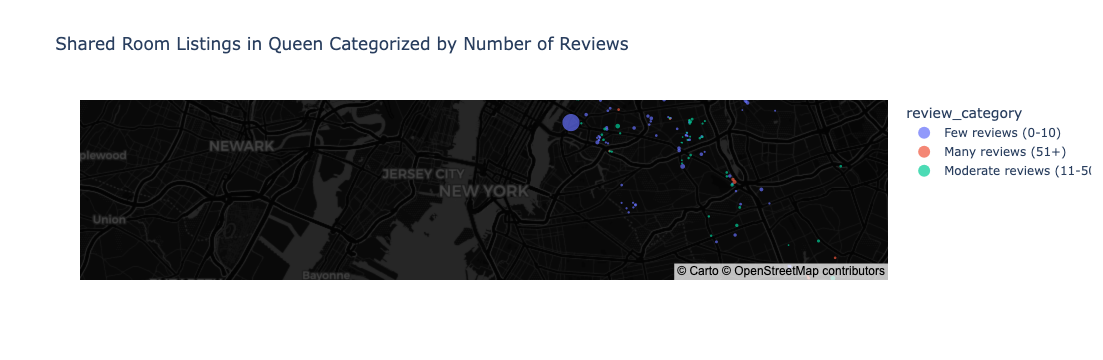

In [57]:
bins = [0, 10, 50, float('inf')]
labels = ['Few reviews (0-10)', 'Moderate reviews (11-50)', 'Many reviews (51+)']
shared_queens['review_category'] = pd.cut(shared_queens['number_of_reviews'], bins=bins, labels = labels, include_lowest = True)

fig3 = px.scatter_mapbox(
        shared_queens,
        lat = 'latitude',
        lon = 'longitude',
        color= 'review_category',
        size = 'price',
        hover_name = 'name',
        hover_data = {
            'price': True,
            'number_of_reviews':True,
            'availability_365':True
        },
        title = 'Shared Room Listings in Queen Categorized by Number of Reviews',
        mapbox_style='carto-darkmatter',
        center = {'lat':40.7128,'lon':-74.0060},
        zoom=10,
        size_max = 15
    )

fig3.show()


In [58]:
sp = pd.read_csv('S&P.csv', header=1)
sp.head()

Year  S&P 500  Dividends Dividend Yield T.Bond rate Return on bond  \
0  1927.0    17.66       0.62          3.50%       3.17%            NaN   
1  1928.0    24.35       1.05          4.30%       3.45%          0.84%   
2  1929.0    21.45       0.88          4.10%       3.36%          4.20%   
3  1930.0    15.34       0.72          4.70%       3.22%          4.54%   
4  1931.0     8.12       0.50          6.10%       3.93%         -2.56%   

  Aaa Bond Rate Return on Aaa  Baa Bond Rate Return on Baa   \
0         4.46%            NaN         5.32%            NaN   
1         4.61%          3.28%         5.60%          3.22%   
2         4.67%          4.14%         5.95%          3.02%   
3         4.52%          5.86%         6.71%          0.54%   
4         5.32%         -1.56%        10.42%        -15.68%   

  Returns on Real Estate  Unnamed: 11  
0                    NaN          NaN  
1                  1.49%          NaN  
2                 -2.06%          NaN  
3                 -4.30%          NaN  
4                 -8.15%          NaN

In [59]:
sp = sp.drop(columns = 'Unnamed: 11')
sp.head()

Year  S&P 500  Dividends Dividend Yield T.Bond rate Return on bond  \
0  1927.0    17.66       0.62          3.50%       3.17%            NaN   
1  1928.0    24.35       1.05          4.30%       3.45%          0.84%   
2  1929.0    21.45       0.88          4.10%       3.36%          4.20%   
3  1930.0    15.34       0.72          4.70%       3.22%          4.54%   
4  1931.0     8.12       0.50          6.10%       3.93%         -2.56%   

  Aaa Bond Rate Return on Aaa  Baa Bond Rate Return on Baa   \
0         4.46%            NaN         5.32%            NaN   
1         4.61%          3.28%         5.60%          3.22%   
2         4.67%          4.14%         5.95%          3.02%   
3         4.52%          5.86%         6.71%          0.54%   
4         5.32%         -1.56%        10.42%        -15.68%   

  Returns on Real Estate  
0                    NaN  
1                  1.49%  
2                 -2.06%  
3                 -4.30%  
4                 -8.15%

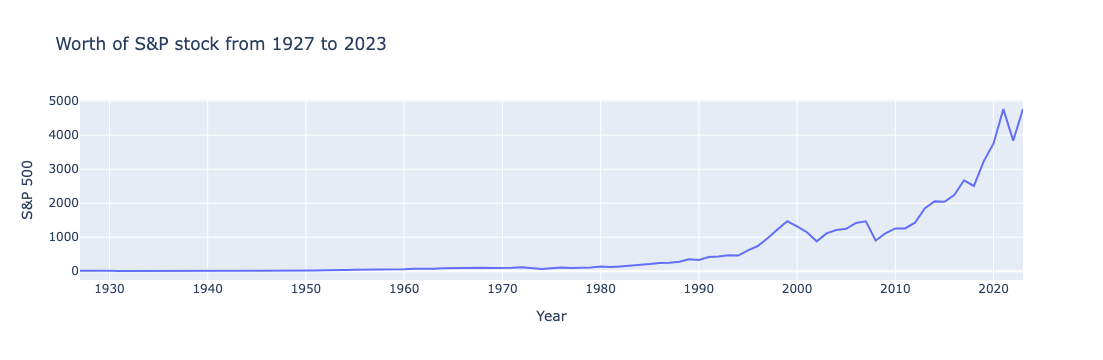

In [60]:
fig4 = px.line(sp, x='Year', y='S&P 500', title = 'Worth of S&P stock from 1927 to 2023')
fig4.show()

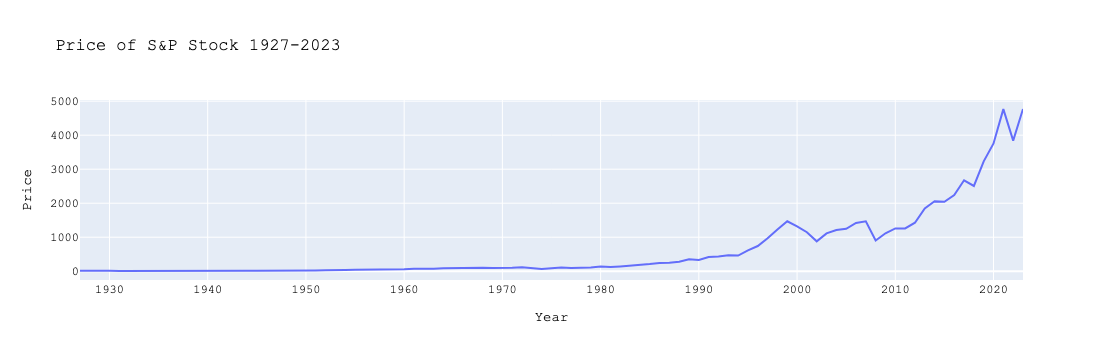

In [61]:
fig4.update_layout(
    title = 'Price of S&P Stock 1927-2023',
    xaxis_title='Year',
    yaxis_title='Price',
    font = dict(
        family = 'Courier New',
        size=12,
        color='black'
    )
)

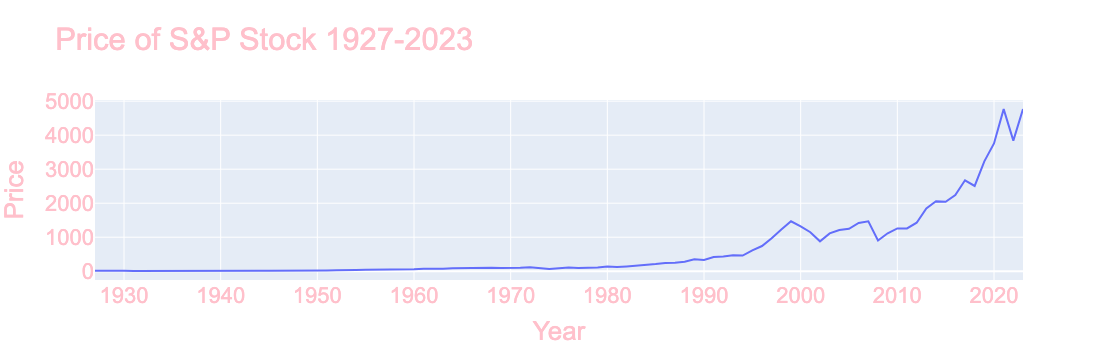

In [62]:
fig4.update_layout(
    font=dict(
        family='Arial',
        size=22,
        color='pink'
    )
)

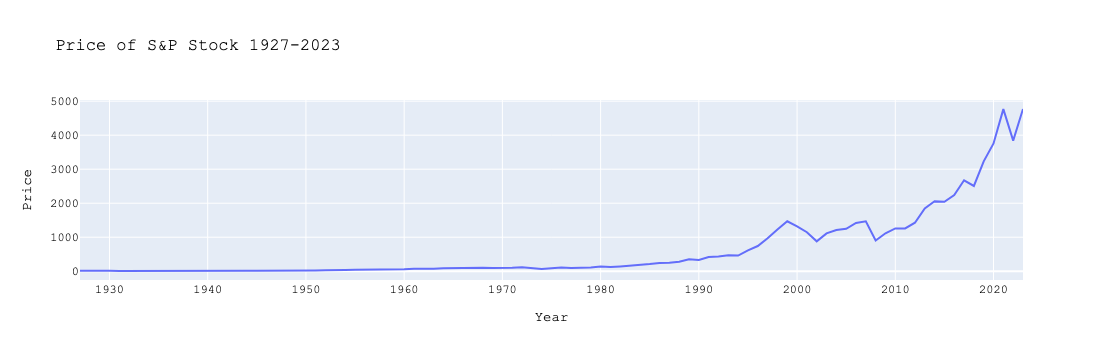

In [63]:
fig4.update_layout(
    title = 'Price of S&P Stock 1927-2023',
    xaxis_title='Year',
    yaxis_title='Price',
    font = dict(
        family = 'Courier New',
        size=12,
        color='black'
    )
)

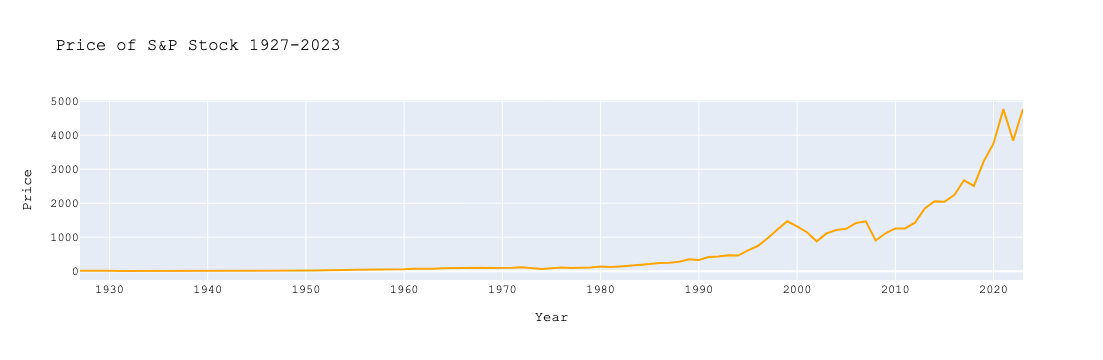

In [64]:
fig4.update_traces(line_color='orange', selector=dict(type='scatter'))

In [65]:
dict(hoverlabel = '')

{'hoverlabel': ''}

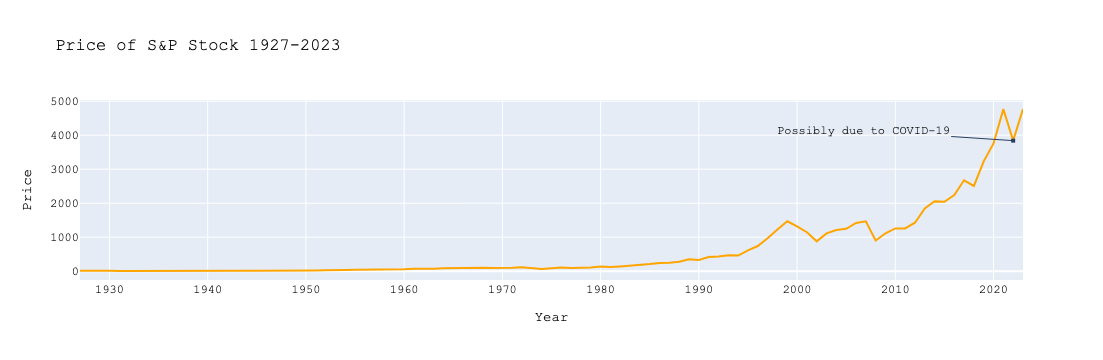

In [66]:
fig4.add_annotation(
    x='2022',
    y=3839.5,
    text='Possibly due to COVID-19',
    showarrow = True,
    arrowhead=7,
    ax=-150,
    ay=-10,
    hovertext = 'COVID-19 was a pandemic lasting from 2020 until 2023 <br> This is me creating a second line <br> This is me creating a third line',
    hoverlabel = {
        'bgcolor' : 'white',
        'bordercolor': 'black',
        'font':{
            'color' : 'black'}}
        )


Links to an external site. Create another line chart with two new values (make sure if they are percentages that both of your columns are percentages). We decided to compare the Aaa Bond Rate and T. Bond rate.

In [67]:
sp.head()

Year  S&P 500  Dividends Dividend Yield T.Bond rate Return on bond  \
0  1927.0    17.66       0.62          3.50%       3.17%            NaN   
1  1928.0    24.35       1.05          4.30%       3.45%          0.84%   
2  1929.0    21.45       0.88          4.10%       3.36%          4.20%   
3  1930.0    15.34       0.72          4.70%       3.22%          4.54%   
4  1931.0     8.12       0.50          6.10%       3.93%         -2.56%   

  Aaa Bond Rate Return on Aaa  Baa Bond Rate Return on Baa   \
0         4.46%            NaN         5.32%            NaN   
1         4.61%          3.28%         5.60%          3.22%   
2         4.67%          4.14%         5.95%          3.02%   
3         4.52%          5.86%         6.71%          0.54%   
4         5.32%         -1.56%        10.42%        -15.68%   

  Returns on Real Estate  
0                    NaN  
1                  1.49%  
2                 -2.06%  
3                 -4.30%  
4                 -8.15%

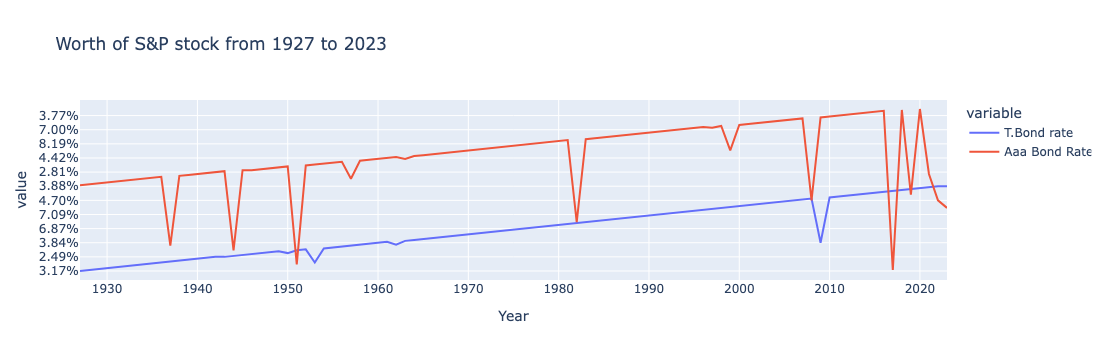

In [68]:
fig5 = px.line(sp, x='Year', y=['T.Bond rate','Aaa Bond Rate'], title = 'Worth of S&P stock from 1927 to 2023')
fig5.show()

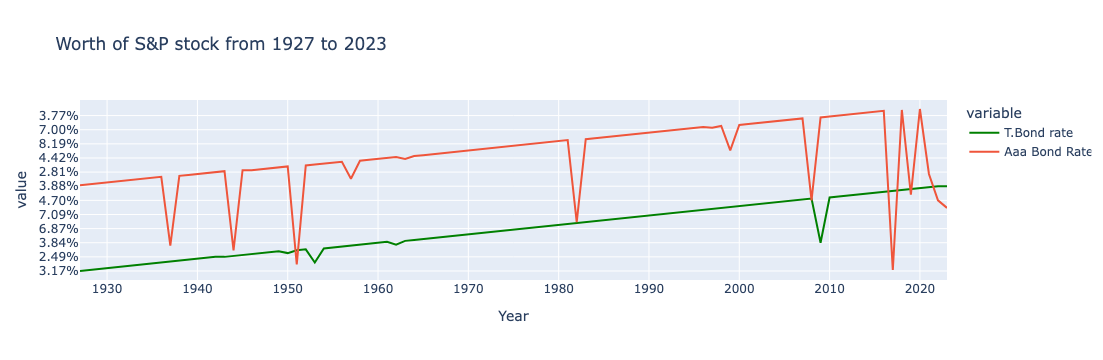

In [69]:
#information for traces
fig5.data[0].line = {'color':'green'}
fig5.show()

In [70]:
df = pd.read_csv('country_wise_latest.csv')
df.head()

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1                    5.25                 4171            709   
2                    6.17                23691           4282   
3                    6.48                  884             23   
4                   16.94                  749            201   

   1 week % increase             WHO Region  
0               2.07  Eastern Mediterranean  
1              17.00                 Europe  
2              18.07                 Africa  
3               2.60                 Europe  
4              26.84                 Africa

In [71]:
df.describe()

/Users/nemoby/opt/anaconda3/envs/indata_fa24/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning:

invalid value encountered in subtract



Confirmed         Deaths     Recovered        Active     New cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4.000000   
50%    5.059000e+03     108.000000  2.815000e+03  1.600000e+03     49.000000   
75%    4.046050e+04     734.000000  2.260600e+04  9.149000e+03    419.500000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  56336.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count   187.000000     187.000000          187.000000             187.000000   
mean     28.957219     933.812834            3.019519              64.820535   
std     120.037173    4197.719635            3.454302              26.287694   
min       0.000000       0.000000            0.000000               0.000000   
25%       0.000000       0.000000            0.945000              48.770000   
50%       1.000000      22.000000            2.150000              71.320000   
75%       6.000000     221.000000            3.875000              86.885000   
max    1076.000000   33728.000000           28.560000             100.000000   

       Deaths / 100 Recovered  Confirmed last week  1 week change  \
count                  187.00         1.870000e+02     187.000000   
mean                      inf         7.868248e+04    9448.459893   
std                       NaN         3.382737e+05   47491.127684   
min                      0.00         1.000000e+01     -47.000000   
25%                      1.45         1.051500e+03      49.000000   
50%                      3.62         5.020000e+03     432.000000   
75%                      6.44         3.708050e+04    3172.000000   
max                       inf         3.834677e+06  455582.000000   

       1 week % increase  
count         187.000000  
mean           13.606203  
std            24.509838  
min            -3.840000  
25%             2.775000  
50%             6.890000  
75%            16.855000  
max           226.320000

In [72]:
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [73]:
df.drop_duplicates()

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0            10             18                3.50                  69.49   
1             6             63                2.95                  56.25   
2             8            749                4.16                  67.34   
3             0              0                5.73                  88.53   
4             1              0                4.32                  25.47   
..          ...            ...                 ...                    ...   
182           2              0                0.73                  35.33   
183           0              0               10.00                  80.00   
184           4             36               28.56                  49.26   
185           1            465                3.08                  61.84   
186           2             24                1.33                  20.04   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                      5.04                35526            737   
1                      5.25                 4171            709   
2                      6.17                23691           4282   
3                      6.48                  884             23   
4                     16.94                  749            201   
..                      ...                  ...            ...   
182                    2.08                 8916           1705   
183                   12.50                   10              0   
184                   57.98                 1619             72   
185                    4.97                 3326           1226   
186                    6.64                 1713            991   

     1 week % increase             WHO Region  
0                 2.07  Eastern Mediterranean  
1                17.00                 Europe  
2                18.07                 Africa  
3                 2.60                 Europe  
4                26.84                 Africa  
..                 ...                    ...  
182              19.12  Eastern Mediterranean  
183               0.00                 Africa  
184               4.45  Eastern Mediterranean  
185              36.86                 Africa  
186              57.85                 Africa  

[187 rows x 15 columns]

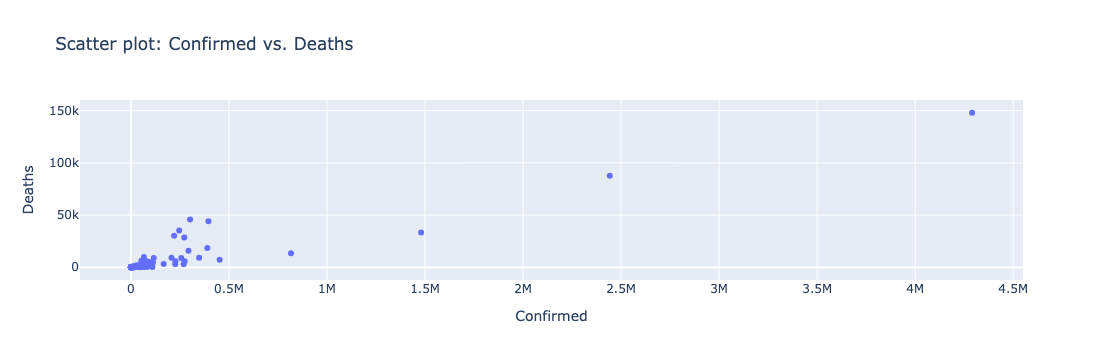

In [74]:
fig6 = px.scatter(df, x='Confirmed',
                y = 'Deaths',
                title = 'Scatter plot: Confirmed vs. Deaths')
fig6.show()

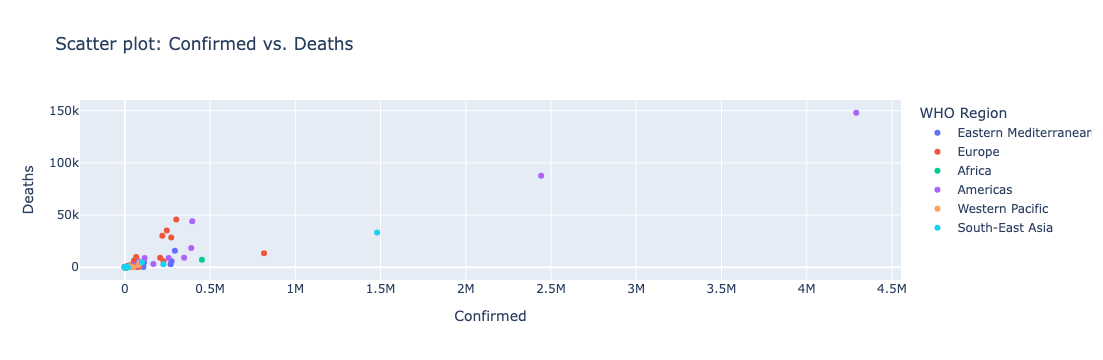

In [75]:
fig7 = px.scatter(df, x='Confirmed',
                y = 'Deaths',
                 color='WHO Region',
                title = 'Scatter plot: Confirmed vs. Deaths')
fig7.show()

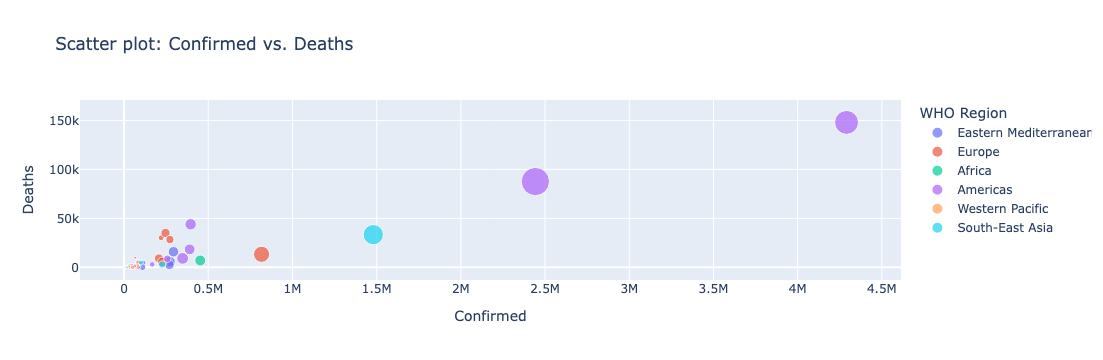

In [76]:
fig8 = px.scatter(df, x='Confirmed',
                y = 'Deaths',
                 color='WHO Region',
                 size='Recovered',
                title = 'Scatter plot: Confirmed vs. Deaths')
fig8.show()

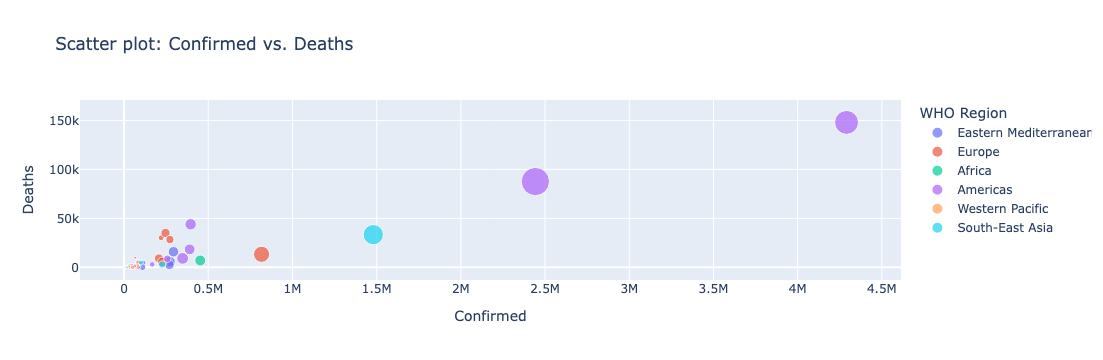

In [77]:
fig9 = px.scatter(df, x='Confirmed',
                y = 'Deaths',
                 color='WHO Region',
                 size='Recovered',
                 hover_data = ['Country/Region','Active','New cases'],
                title = 'Scatter plot: Confirmed vs. Deaths')
fig9.show()

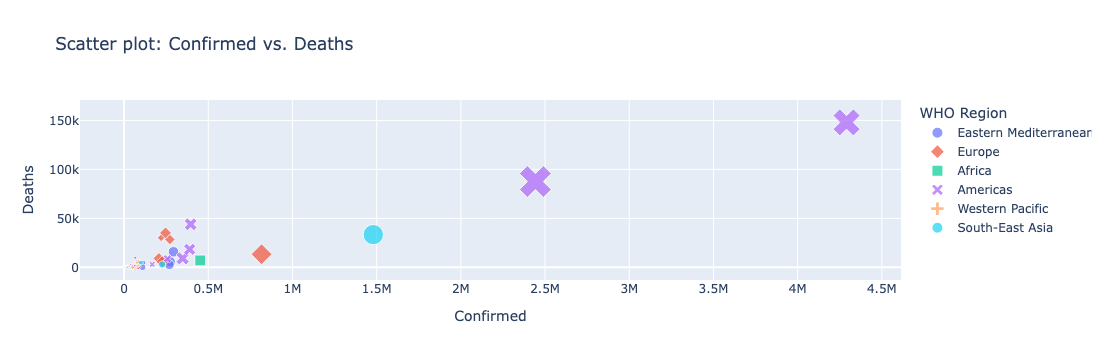

In [78]:
fig10 = px.scatter(df, x='Confirmed',
                y = 'Deaths',
                 color='WHO Region',
                 size='Recovered',
                 hover_data = ['Country/Region','Active','New cases'],
                title = 'Scatter plot: Confirmed vs. Deaths',
                symbol='WHO Region')
fig10.show()

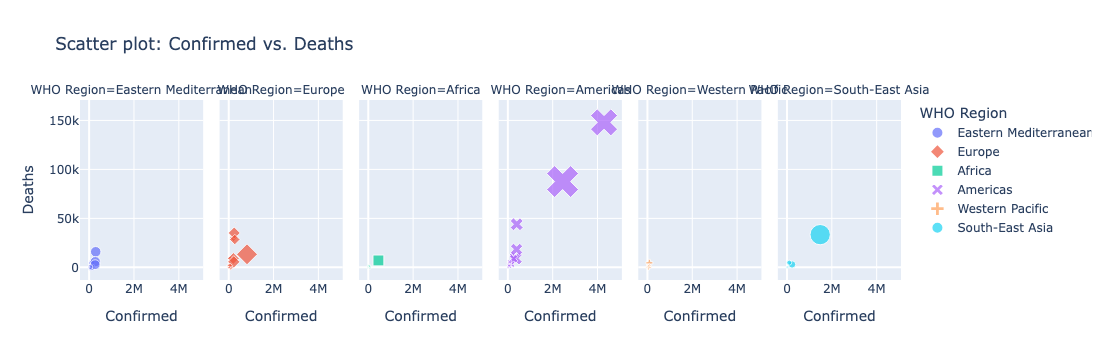

In [79]:
fig = px.scatter(df, x='Confirmed',
                y = 'Deaths',
                 color='WHO Region',
                 size='Recovered',
                 hover_data = ['Country/Region','Active','New cases'],
                title = 'Scatter plot: Confirmed vs. Deaths',
                symbol='WHO Region',
                facet_col='WHO Region')
fig.show()